### Importing Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('F:/50_Startups.csv')
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [3]:
df.shape

(50, 5)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


### EDA

Numerical features

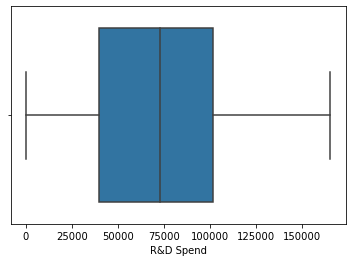

In [5]:
sns.boxplot(x='R&D Spend',data=df)

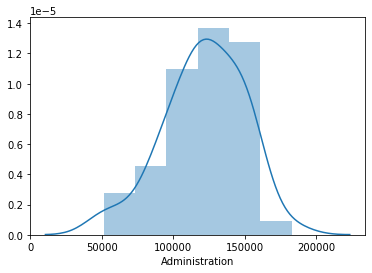

In [6]:
sns.distplot(df['Administration']);

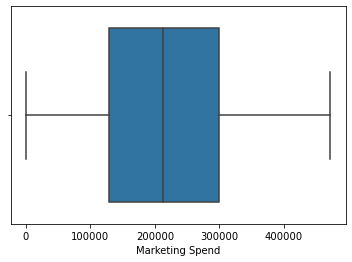

In [7]:
sns.boxplot(x='Marketing Spend',data=df)

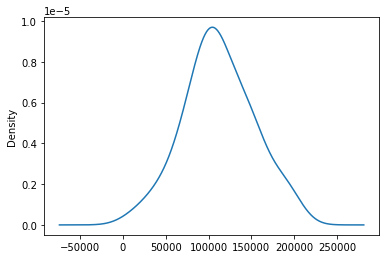

In [8]:
df['Profit'].plot.kde()

Categorical features

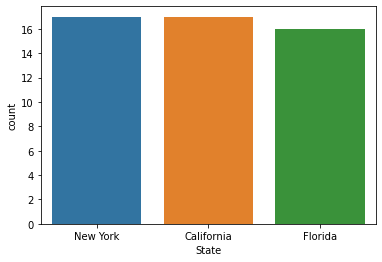

In [9]:
sns.countplot(x='State',data=df)

Checking Correlation

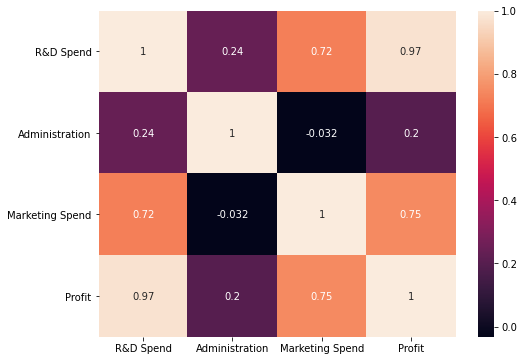

In [10]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(),annot=True);

* Above graph shows there is strong correlation between R&D spending and Profit

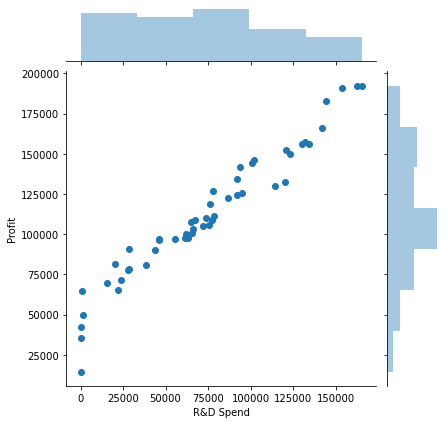

In [11]:
sns.jointplot(x='R&D Spend',y='Profit',data=df)

* Above plot shows us that more the spending on R&D, the more profit company gets.

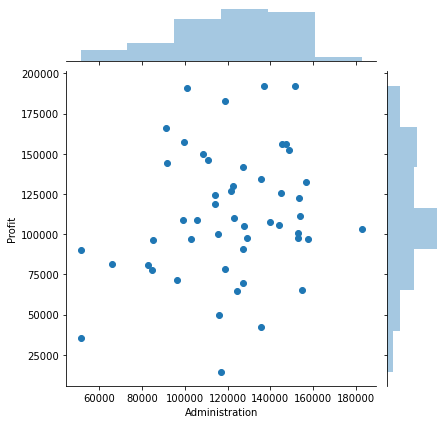

In [12]:
sns.jointplot(x='Administration',y='Profit',data=df)

### Model Building

In [13]:
X = df.drop('Profit',1)
y = df['Profit']

In [14]:
X.shape,y.shape

((50, 4), (50,))

Encoding the Categorical data

In [15]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
cols = X.columns
X_enc = X.copy()
for col in cols:
    lb = LabelEncoder() 
    X_enc[col] = lb.fit_transform(X[col].values)

In [16]:
#Or you can do

#from sklearn.preprocessing import LabelEncoder, OneHotEncoder
#from sklearn.compose import ColumnTransformer
#labelencoder_X = LabelEncoder()
#X[:,3] = labelencoder_X.fit_transform(X[:,3])
#ct = ColumnTransformer([("State", OneHotEncoder(),[3])], remainder="passthrough") # The last arg ([0]) is the list of columns you want to transform in this step
#X = ct.fit_transform(X) 

Train_Test_Split

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_enc, y, test_size=0.20,random_state=0)

In [18]:
m = y_test

Training Model

In [19]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

Predict the Result

In [20]:
y_pred = regressor.predict(X_test)
y_pred

array([101736.50917467, 140776.87187233, 142253.90461107,  69892.28012488,
       172633.40321498, 113826.16031332,  62235.09910932,  87386.80148412,
       115805.79782878, 167003.58643891])

In [21]:
#Sample checking the performance of model

regressor.predict([[48,34,47,2]])

array([177754.99131641])

Evaluating the model

In [22]:
# Calculating the R squared value
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.921646646003781

In [23]:
# Calculating the Coefficients
print(regressor.coef_)

[2489.57250827   23.86336202  265.67747473 -937.76919092]


In [24]:
# Calculating the Intercept
print(regressor.intercept_)

46832.853680676526


Plotting the Results

Text(0.5, 1.0, 'Actual Vs Predicted')

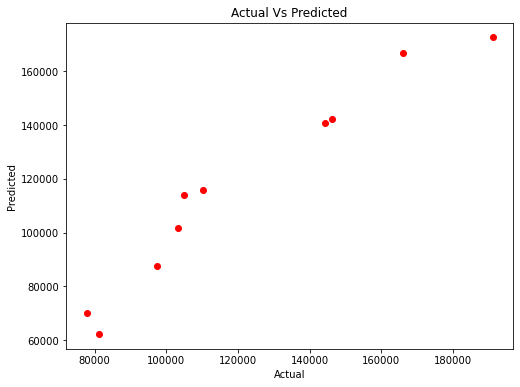

In [25]:
plt.figure(figsize=(8,6))
plt.scatter(y_test,y_pred,color='red')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual Vs Predicted')

Predicted Values

In [26]:
pred_y_df = pd.DataFrame({'Actual Value':y_test, 'Predicted Value':y_pred, 'Difference':y_test-y_pred })
pred_y_df

,Actual Value,Predicted Value,Difference
28,103282.38,101736.509175,1545.870825
11,144259.40,140776.871872,3482.528128
10,146121.95,142253.904611,3868.045389
41,77798.83,69892.280125,7906.549875
2,191050.39,172633.403215,18416.986785
27,105008.31,113826.160313,-8817.850313
38,81229.06,62235.099109,18993.960891
31,97483.56,87386.801484,10096.758516
22,110352.25,115805.797829,-5453.547829
4,166187.94,167003.586439,-815.646439
